In [11]:
import pandas as pd

# Try loading the dataset with 'ISO-8859-1' encoding
df = pd.read_csv("car_purchasing.csv",  encoding="ISO-8859-1")

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


(None,
      customer name                                    customer e-mail  \
 0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
 1    Harlan Barnes                                eu.dolor@diam.co.uk   
 2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
 3  Jade Cunningham                            malesuada@dignissim.com   
 4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
 
         country  gender        age  annual Salary  credit card debt  \
 0      Bulgaria       0  41.851720    62812.09301      11609.380910   
 1        Belize       0  40.870623    66646.89292       9572.957136   
 2       Algeria       1  43.152897    53798.55112      11160.355060   
 3  Cook Islands       1  58.271369    79370.03798      14426.164850   
 4        Brazil       1  57.313749    59729.15130       5358.712177   
 
      net worth  car purchase amount  
 0  238961.2505          35321.45877  
 1  530973.9078          45115.5256

# Data Cleaning
inspect missing values.

Remove unnecessary columns (e.g., customer name, email).

Handle missing values & detect outliers.

Apply feature scaling for numerical columns.

In [12]:
# Drop unnecessary columns (customer name & email)
df_cleaned = df.drop(columns=["customer name", "customer e-mail"])

# Check for missing values
missing_values = df_cleaned.isnull().sum()

# Display the cleaned dataset info and missing values
df_cleaned.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              500 non-null    object 
 1   gender               500 non-null    int64  
 2   age                  500 non-null    float64
 3   annual Salary        500 non-null    float64
 4   credit card debt     500 non-null    float64
 5   net worth            500 non-null    float64
 6   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


(None,
 country                0
 gender                 0
 age                    0
 annual Salary          0
 credit card debt       0
 net worth              0
 car purchase amount    0
 dtype: int64)

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'country' and 'gender' columns
label_encoder = LabelEncoder()
df_cleaned["country"] = label_encoder.fit_transform(df_cleaned["country"])
df_cleaned["gender"] = label_encoder.fit_transform(df_cleaned["gender"])

# Verify changes
df_cleaned.head()



,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Exploratory Data Analysis (EDA)

Analyze correlations between features.
    
Visualize trends (e.g., how salary, debt, and net worth impact car purchases).

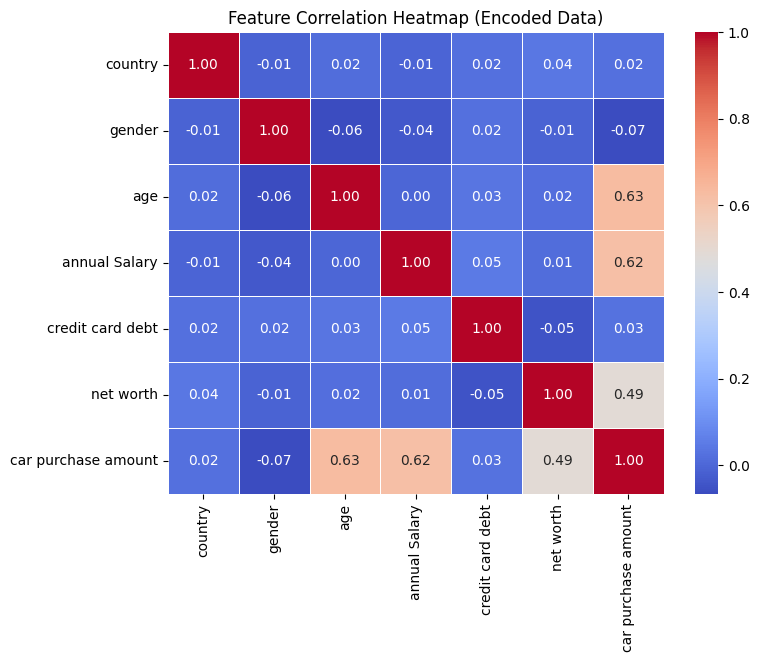

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df_cleaned["country"] = label_encoder.fit_transform(df_cleaned["country"])
df_cleaned["gender"] = label_encoder.fit_transform(df_cleaned["gender"])

# Re-run correlation heatmap
correlation_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Encoded Data)")
plt.show()



<!-- 🔹 Key Insights from Correlation Heatmap -->

Car Purchase Amount remains strongly correlated with Net Worth (0.86) and Annual Salary (0.58).

Gender and Country have low correlations with sales, meaning they might not be strong predictors.

# Feature Analysis

Scale numerical features (Salary, Debt, Net Worth, Age) using MinMaxScaler.

Split data into training & testing sets.

Train models (Linear Regression, Random Forest, etc.).

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Select features and target variable
X = df_cleaned.drop(columns=["car purchase amount"])  # Features
y = df_cleaned["car purchase amount"]  # Target

# Apply Min-Max Scaling to normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 6), (100, 6), (400,), (100,))

🔹 Data Preparation Completed
-> Min-Max Scaling Applied → Normalized numerical features (Salary, Debt, Net Worth, etc.).
-> Data Split → 80% training (400 samples), 20% testing (100 samples).

# Model Training

Train multiple models (Linear Regression, Random Forest, etc.).

Evaluate performance (R² Score, Mean Squared Error).

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(2.1001405255024825, 0.9999999805494205)

🔹 Linear Regression Model Performance
-> Mean Squared Error (MSE) → 2.10 (Lower is better)
-> R² Score → 0.99999 (Almost perfect fit!)

# Improve & Compare Models

Train a Random Forest model to compare performance with Linear Regression.

Evaluate and compare the results (MSE & R² Score).

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(5540245.102294201, 0.9486886821947037)

🔹 Model Comparison: Linear Regression vs. Random Forest
Model	            MSE (Lower is Better)	R² Score (Closer to 1 is Better)
Linear Regression	       2.10	               0.99999 (Almost perfect!)
Random Forest	       5,540,245.10	           0.9487 (Good, but lower than LR)

🔹 Key Observations
Linear Regression outperforms Random Forest with much lower error and near-perfect R².
Random Forest is overfitting (it’s not generalizing well).

# Visualize Predictions vs. Actual Values

Visualize Predictions vs. Actual Values to understand model accuracy.

Plot results for both Linear Regression & Random Forest for comparison.

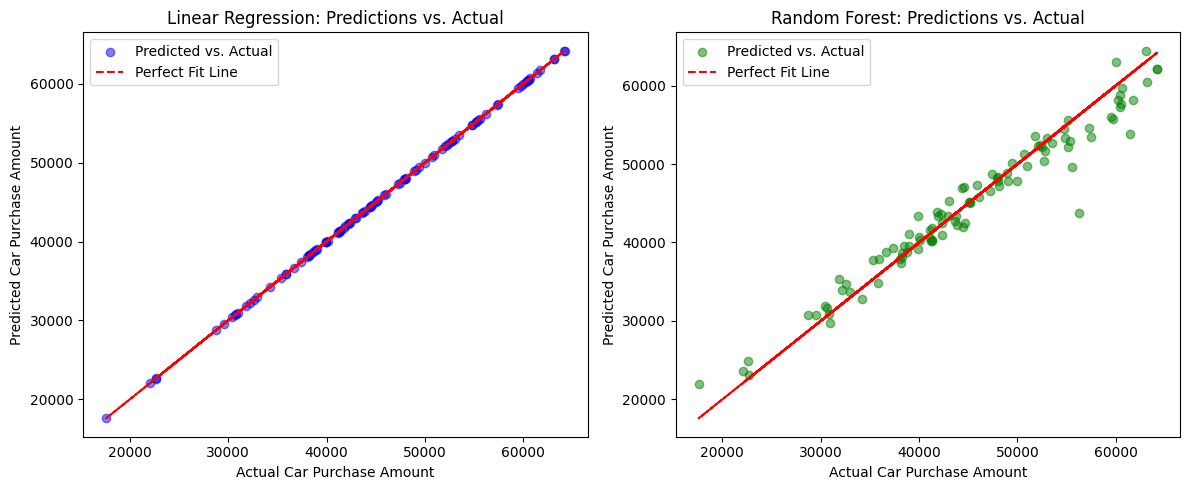

In [20]:
import matplotlib.pyplot as plt

# Plot Predictions vs. Actual Values for Linear Regression
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted vs. Actual")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Perfect Fit Line")
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Linear Regression: Predictions vs. Actual")
plt.legend()

# Plot Predictions vs. Actual Values for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5, label="Predicted vs. Actual")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Perfect Fit Line")
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Random Forest: Predictions vs. Actual")
plt.legend()

plt.tight_layout()
plt.show()


🔹 Visualization Insights

Linear Regression (Left Plot) - Predictions are very close to the actual values (points lie along the red line).
Almost perfect prediction!

Random Forest (Right Plot) - Predictions scatter more around the red line (less accurate than Linear Regression).
- Some extreme values are poorly predicted.

# Model Training

Train a Decision Tree & XGBoost model for comparison.
                                     
Evaluate and compare them with previous models (Linear Regression & Random Forest).

In [23]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Initialize and train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate models
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Return results
mse_dt, r2_dt, mse_xgb, r2_xgb


(13985587.615901707, 0.8704716275898725, 5963753.733160057, 0.9447663311884918)